In [49]:
import scanpy as sc
import pandas as pd
from cellbender.remove_background.downstream import anndata_from_h5

In [89]:
adata_in=sc.read_10x_h5('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/matrix_filtered_clear/limb_regen_data/intact/output_filtered.h5')
adata_in=anndata_from_h5('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/matrix_filtered_clear/limb_regen_data/intact/output.h5')

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [51]:
adata_in.obs

background_fraction  cell_probability     cell_size  \
barcode                                                                   
AGAACCTGTGTTTACG-1             0.007141          0.999955  44514.632812   
AGGAAATCAGGCATGA-1             0.019975          0.999955  35074.746094   
TCTCTGGCAACAAGAT-1             0.006666          0.999955  36329.359375   
CACCAAACAACTGCTA-1             0.006975          0.999955  33885.492188   
CATGCCTCAACCCGCA-1             0.006986          0.999955  33468.460938   
...                                 ...               ...           ...   
ACGTAACCACCCAATA-1             0.999998          0.000582   3543.014893   
ATCCATTTCGTCAACA-1             0.999998          0.000377   3668.344238   
CCTCTAGGTCATCAGT-1             0.999998          0.000231   3617.966553   
AAGTGAATCTTCGTAT-1             0.999998          0.000158   3663.854980   
CAATGACCAAGCAATA-1             0.999998          0.000155   3562.557861   

                    droplet_efficiency  
barcode                                 
AGAACCTGTGTTTACG-1            2.492379  
AGGAAATCAGGCATGA-1            2.470583  
TCTCTGGCAACAAGAT-1            2.056317  
CACCAAACAACTGCTA-1            2.103322  
CATGCCTCAACCCGCA-1            2.126675  
...                                ...  
ACGTAACCACCCAATA-1            0.617439  
ATCCATTTCGTCAACA-1            0.550480  
CCTCTAGGTCATCAGT-1            0.575601  
AAGTGAATCTTCGTAT-1            0.552631  
CAATGACCAAGCAATA-1            0.605965  

[13059 rows x 4 columns]

In [52]:
adata_in.var_names

Index(['POL3', 'gene26597', 'gene26598', 'SPX2', 'gene26599', 'gene26600',
       'gene26601', 'gene26602', 'gene26603', 'POL',
       ...
       'gene65588', 'gene65589', 'gene65590', 'gene65591', 'gene65592', 'NU5M',
       'COX1', 'COX1', 'NU2M', 'gene65597'],
      dtype='object', name='gene_name', length=65597)

In [90]:
mapper=pd.read_table("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/aPlwal.pri.V2.genome.annots.tsv")
mapper_dict = mapper.set_index('#gene_id')['EggNM.Preferred_name'].to_dict()

new_var_names_pl = []  # Create an empty list to store the updated variable names

# Iterate through each gene_id in the mapper_dict
for gene_id in adata_in.var_names:
    # Check if the gene_id exists in adata_pl.var_names and if its mapping is not '.'
    if gene_id in mapper_dict.keys() and mapper_dict[gene_id] != '.':
        # Debugging: Print gene_id and its mapping
        print(f"Updating: {gene_id} -> {mapper_dict[gene_id]}")
        # If conditions are met, append the mapped gene_id to new_var_names_pl
        new_var_names_pl.append(mapper_dict[gene_id])
    else:
        # Debugging: Print gene_id that's not updated
        print(f"Not Updating: {gene_id}")
        # If conditions are not met, append the original gene_id to new_var_names_pl
        new_var_names_pl.append(gene_id)

# Update the variable names of adata_pl with the new_var_names_pl list
adata_in.var_names = new_var_names_pl

Not Updating: POL3
Not Updating: gene26597
Not Updating: gene26598
Not Updating: SPX2
Not Updating: gene26599
Not Updating: gene26600
Not Updating: gene26601
Not Updating: gene26602
Updating: gene26603 -> PKNOX2
Not Updating: POL
Not Updating: gene26605
Not Updating: MYPOP
Not Updating: RTXE
Not Updating: HARB1
Not Updating: MYPOP
Not Updating: gene26610
Not Updating: gene26611
Not Updating: LIN1
Not Updating: POL
Not Updating: MYPOP
Not Updating: HARB1
Not Updating: RL23
Not Updating: gene26617
Not Updating: LORF2
Not Updating: gene26619
Not Updating: gene26620
Not Updating: gene26621
Not Updating: PGBD4
Not Updating: gene26623
Not Updating: gene26624
Not Updating: POL
Not Updating: gene26626
Not Updating: POL4
Not Updating: gene26628
Not Updating: gene26629
Not Updating: gene26630
Not Updating: LORF2
Not Updating: ZN583
Not Updating: PGBD4
Not Updating: PGBD4
Not Updating: SIAE
Not Updating: gene26636
Not Updating: gene26637
Not Updating: POL4
Not Updating: gene26639
Not Updating: PO

In [54]:
#Preprocessing
import re
sc.pp.filter_cells(adata_in, min_genes=200)
sc.pp.filter_genes(adata_in, min_cells=3)
adata_in.var['mt']=adata_in.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_in, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata_in = adata_in[adata_in.obs.pct_counts_mt < 5, :]
adata_in=adata_in[adata_in.obs.n_genes_by_counts < 2500, :]
#Removing the mt genes
# Patterns for gene names to remove
patterns_to_remove = ['COX1', 'COX2', 'ATP8', 'ATP6', 'COX3', 'NU1M', 'NU2M', 'NU3M', 'NU4M', 'NU4LM', 'NU5M', 'NU6M', 'CYB']

# Create a regular expression pattern by joining the patterns with the '|' (OR) operator
gene_pattern = '|'.join(patterns_to_remove)

# Use the regex pattern to filter and remove genes
adata_in = adata_in[:, ~adata_in.var_names.str.contains(gene_pattern, regex=True)]
adata_in.var_names_make_unique()

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/a

In [55]:
#Preprocessing
sc.pp.normalize_total(adata_in, target_sum=1e4)
sc.pp.log1p(adata_in)
sc.pp.scale(adata_in, max_value=10)

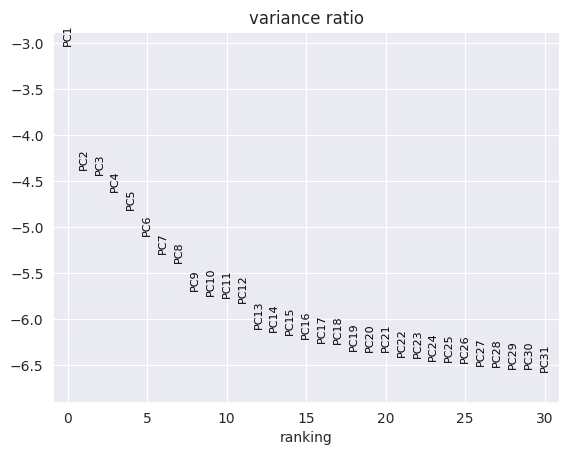

In [56]:
#PCA
sc.tl.pca(adata_in, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_in, log=True)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


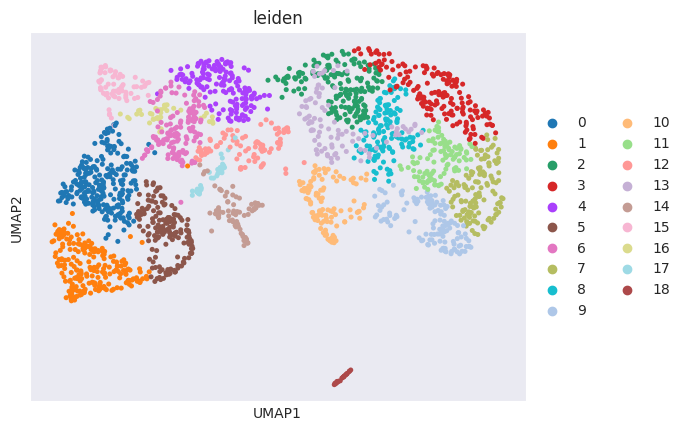

In [57]:
#Umap
sc.pp.neighbors(adata_in, n_neighbors=20, n_pcs=30)
sc.tl.umap(adata_in)
sc.tl.leiden(adata_in, resolution=1)
sc.pl.umap(adata_in, color=['leiden'])

In [58]:
adata_in.obs

background_fraction  cell_probability     cell_size  \
barcode                                                                   
AGGAAATCAGGCATGA-1             0.019975          0.999955  35074.746094   
GCGGATCCATCGATAC-1             0.012224          0.999955  51328.609375   
CAGATACCAGTCAGTT-1             0.013072          0.999955  47890.542969   
CGATGGCTCCAGCTCT-1             0.012948          0.999955  48192.468750   
AGGAATATCTGACGCG-1             0.013870          0.999955  46157.589844   
...                                 ...               ...           ...   
TCTCACGTCGATTCCC-1             0.639733          0.939861   3843.313965   
CATGGTAAGCAGGCAT-1             0.318826          0.508739   3993.198975   
CGATGGCCAAGGAGTC-1             0.533980          0.876645   3952.160645   
TTCTCTCTCGGACTTA-1             0.510940          0.536155   3671.049561   
GAGTGTTAGCCATGCC-1             0.394948          0.568620   3856.042480   

                    droplet_efficiency  n_genes  n_genes_by_counts  \
barcode                                                              
AGGAAATCAGGCATGA-1            2.470583     1353               1349   
GCGGATCCATCGATAC-1            1.033915     1792               1792   
CAGATACCAGTCAGTT-1            1.081950     2371               2368   
CGATGGCTCCAGCTCT-1            1.054793     2343               2339   
AGGAATATCTGACGCG-1            1.040200     1900               1897   
...                                ...      ...                ...   
TCTCACGTCGATTCCC-1            0.760996      310                308   
CATGGTAAGCAGGCAT-1            0.646552      465                465   
CGATGGCCAAGGAGTC-1            0.624556      357                357   
TTCTCTCTCGGACTTA-1            0.763351      356                356   
GAGTGTTAGCCATGCC-1            0.629676      422                422   

                    total_counts  total_counts_mt  pct_counts_mt leiden  
barcode                                                                  
AGGAAATCAGGCATGA-1         79179                0            0.0      4  
GCGGATCCATCGATAC-1         50343                0            0.0      2  
CAGATACCAGTCAGTT-1         48922                0            0.0      2  
CGATGGCTCCAGCTCT-1         48023                0            0.0      2  
AGGAATATCTGACGCG-1         45217                0            0.0      2  
...                          ...              ...            ...    ...  
TCTCACGTCGATTCCC-1           377                0            0.0     12  
CATGGTAAGCAGGCAT-1           673                0            0.0      6  
CGATGGCCAAGGAGTC-1           432                0            0.0     10  
TTCTCTCTCGGACTTA-1           447                0            0.0     10  
GAGTGTTAGCCATGCC-1           527                0            0.0      8  

[2278 rows x 10 columns]

/home/nikvaku/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_group

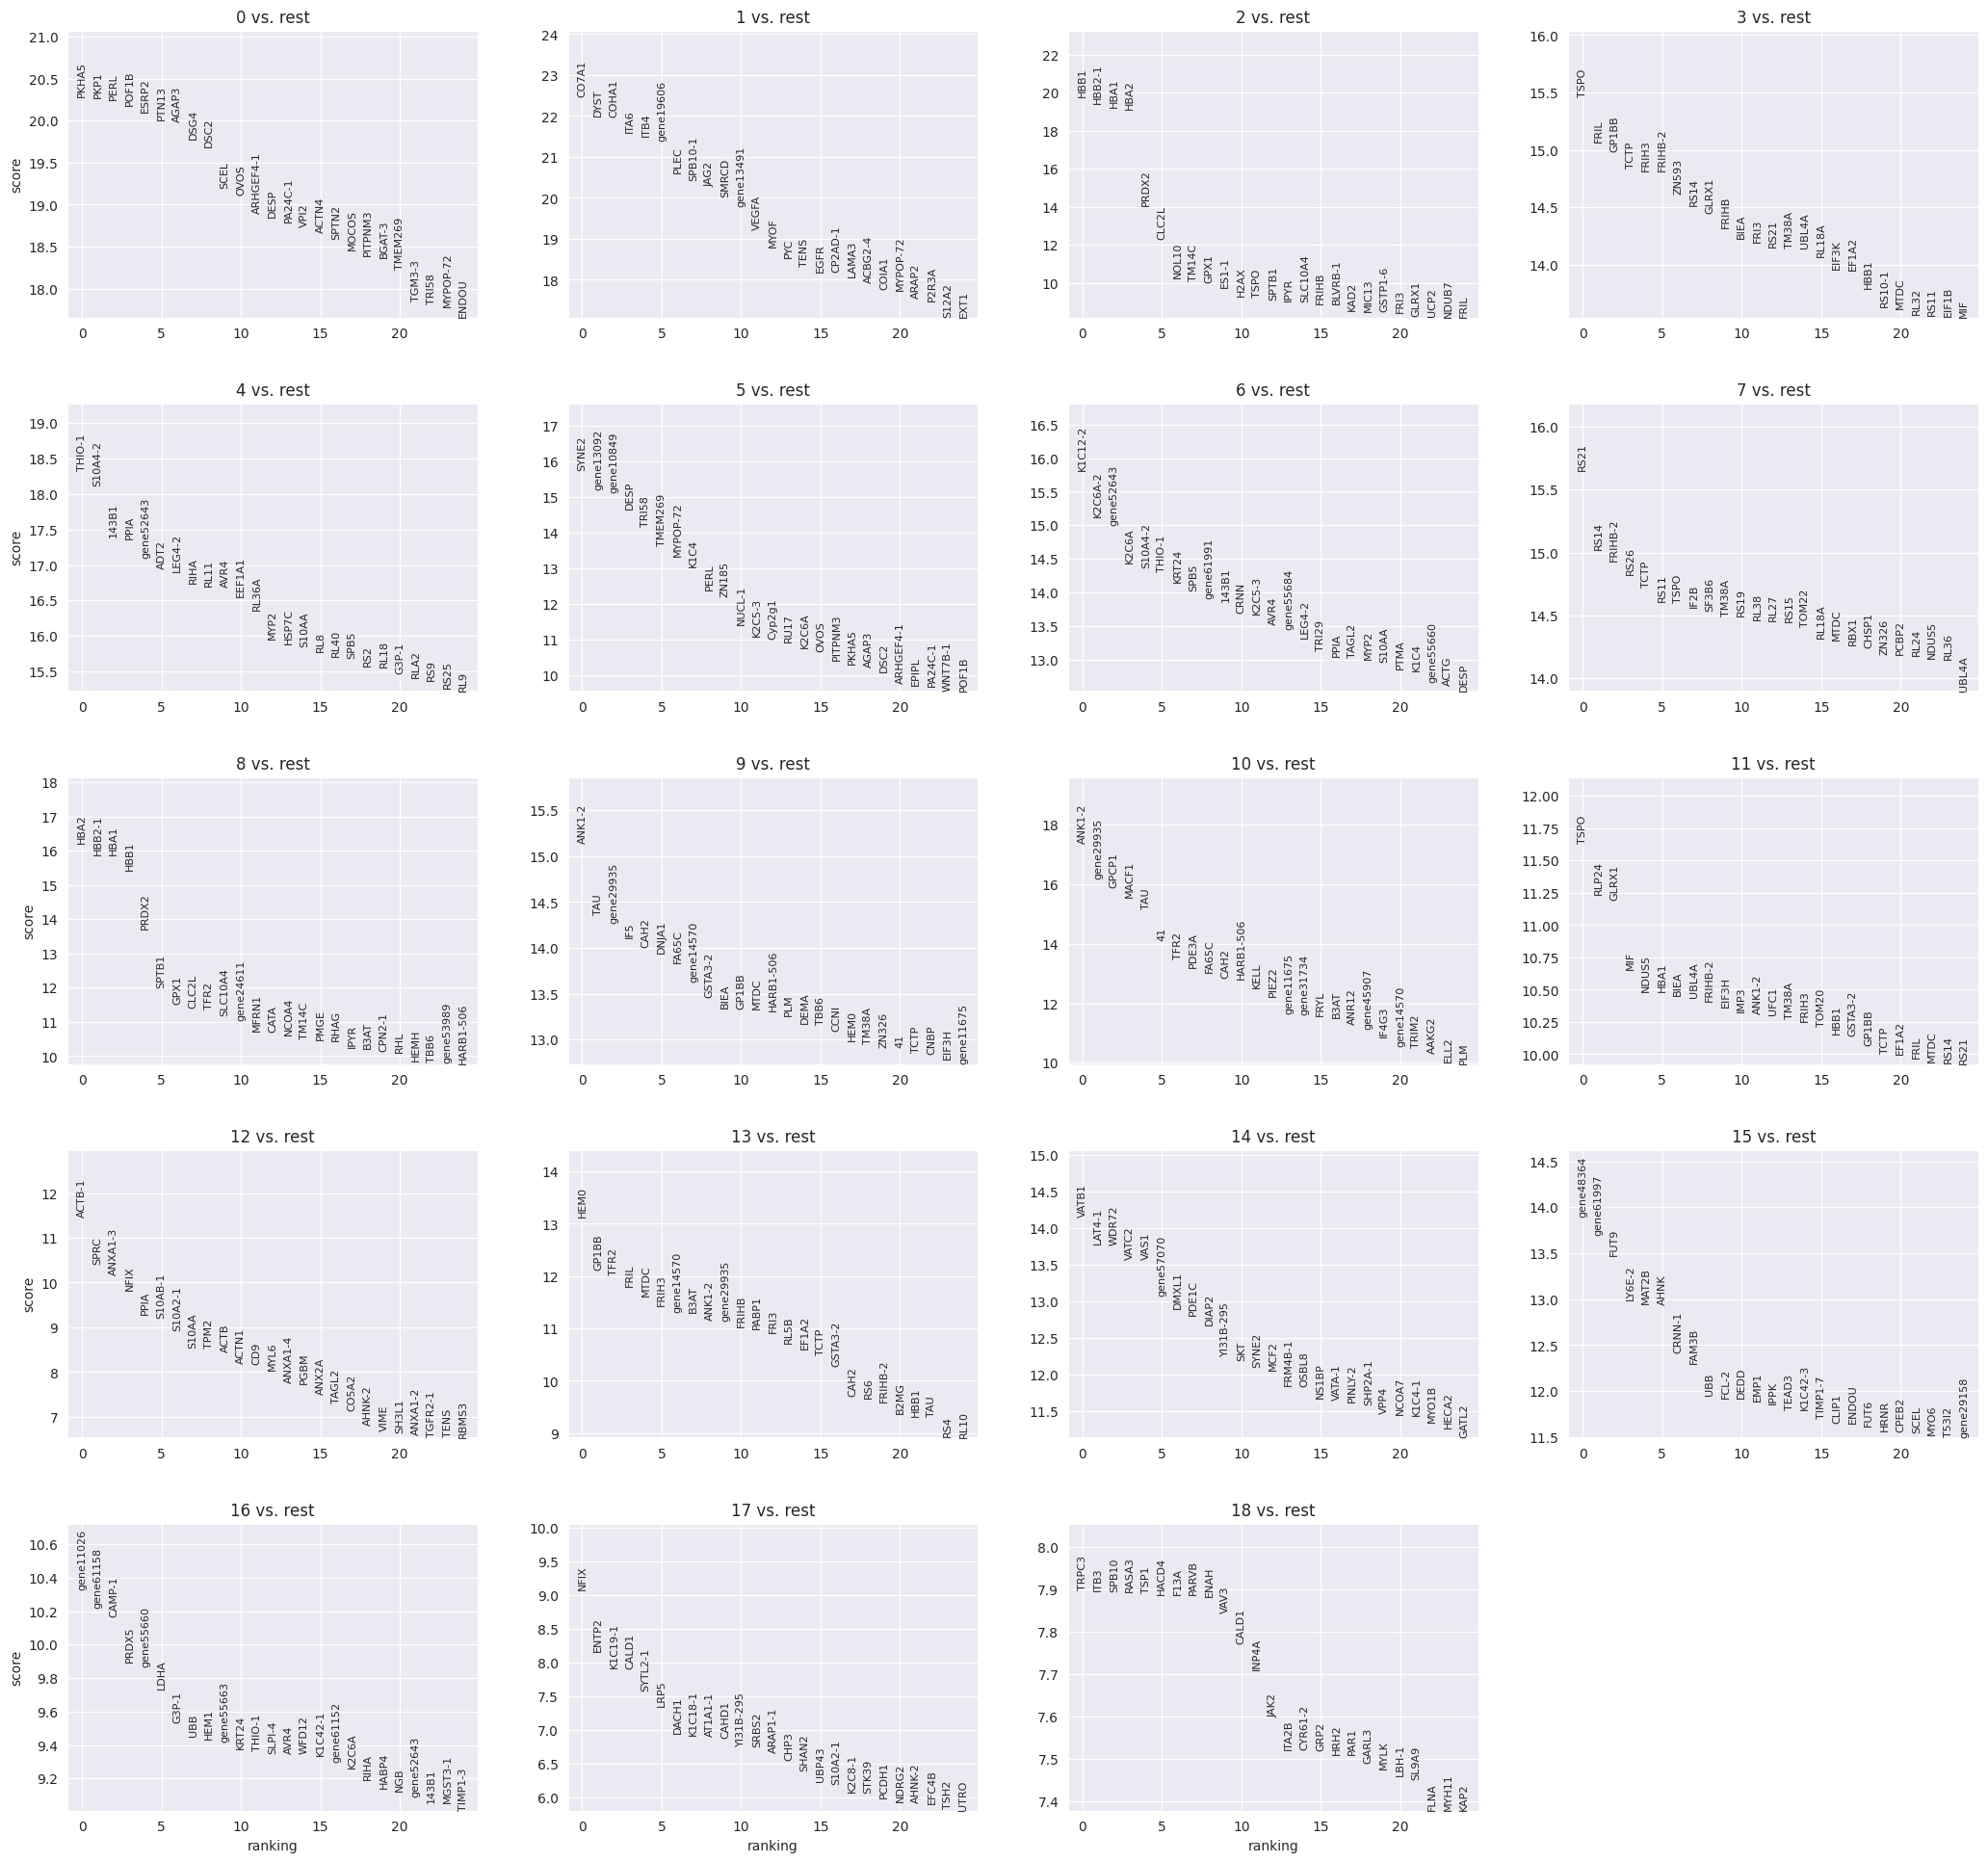

In [76]:
#Differential expression
sc.tl.rank_genes_groups(adata_in, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_in, n_genes=25, sharey=False)

In [91]:
#24h data
adata_24h=sc.read_10x_h5('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/matrix_filtered_clear/limb_regen_data/24hpa/output_filtered.h5')
adata_24h=anndata_from_h5('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/matrix_filtered_clear/limb_regen_data/24hpa/output.h5')

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [80]:
adata_24h

AnnData object with n_obs × n_vars = 11508 × 65597
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed'
    uns: 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'

In [92]:
mapper=pd.read_table("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/aPlwal.pri.V2.genome.annots.tsv")
mapper_dict = mapper.set_index('#gene_id')['EggNM.Preferred_name'].to_dict()

new_var_names_pl = []  # Create an empty list to store the updated variable names

# Iterate through each gene_id in the mapper_dict
for gene_id in adata_24h.var_names:
    # Check if the gene_id exists in adata_pl.var_names and if its mapping is not '.'
    if gene_id in mapper_dict.keys() and mapper_dict[gene_id] != '.':
        # Debugging: Print gene_id and its mapping
        print(f"Updating: {gene_id} -> {mapper_dict[gene_id]}")
        # If conditions are met, append the mapped gene_id to new_var_names_pl
        new_var_names_pl.append(mapper_dict[gene_id])
    else:
        # Debugging: Print gene_id that's not updated
        print(f"Not Updating: {gene_id}")
        # If conditions are not met, append the original gene_id to new_var_names_pl
        new_var_names_pl.append(gene_id)

# Update the variable names of adata_pl with the new_var_names_pl list
adata_24h.var_names = new_var_names_pl

Not Updating: POL3
Not Updating: gene26597
Not Updating: gene26598
Not Updating: SPX2
Not Updating: gene26599
Not Updating: gene26600
Not Updating: gene26601
Not Updating: gene26602
Updating: gene26603 -> PKNOX2
Not Updating: POL
Not Updating: gene26605
Not Updating: MYPOP
Not Updating: RTXE
Not Updating: HARB1
Not Updating: MYPOP
Not Updating: gene26610
Not Updating: gene26611
Not Updating: LIN1
Not Updating: POL
Not Updating: MYPOP
Not Updating: HARB1
Not Updating: RL23
Not Updating: gene26617
Not Updating: LORF2
Not Updating: gene26619
Not Updating: gene26620
Not Updating: gene26621
Not Updating: PGBD4
Not Updating: gene26623
Not Updating: gene26624
Not Updating: POL
Not Updating: gene26626
Not Updating: POL4
Not Updating: gene26628
Not Updating: gene26629
Not Updating: gene26630
Not Updating: LORF2
Not Updating: ZN583
Not Updating: PGBD4
Not Updating: PGBD4
Not Updating: SIAE
Not Updating: gene26636
Not Updating: gene26637
Not Updating: POL4
Not Updating: gene26639
Not Updating: PO

In [62]:
#Preprocessing
import re
sc.pp.filter_cells(adata_24h, min_genes=200)
sc.pp.filter_genes(adata_24h, min_cells=3)
adata_24h.var['mt']=adata_24h.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_24h, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata_24h = adata_24h[adata_24h.obs.pct_counts_mt < 5, :]
adata_24h=adata_24h[adata_24h.obs.n_genes_by_counts < 2500, :]
#Removing the mt genes
# Patterns for gene names to remove
patterns_to_remove = ['COX1', 'COX2', 'ATP8', 'ATP6', 'COX3', 'NU1M', 'NU2M', 'NU3M', 'NU4M', 'NU4LM', 'NU5M', 'NU6M', 'CYB']

# Create a regular expression pattern by joining the patterns with the '|' (OR) operator
gene_pattern = '|'.join(patterns_to_remove)

# Use the regex pattern to filter and remove genes
adata_24h = adata_24h[:, ~adata_24h.var_names.str.contains(gene_pattern, regex=True)]
adata_24h.var_names_make_unique()

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/a

In [63]:
#Preprocessing
sc.pp.normalize_total(adata_24h, target_sum=1e4)
sc.pp.log1p(adata_24h)
sc.pp.scale(adata_24h, max_value=10)

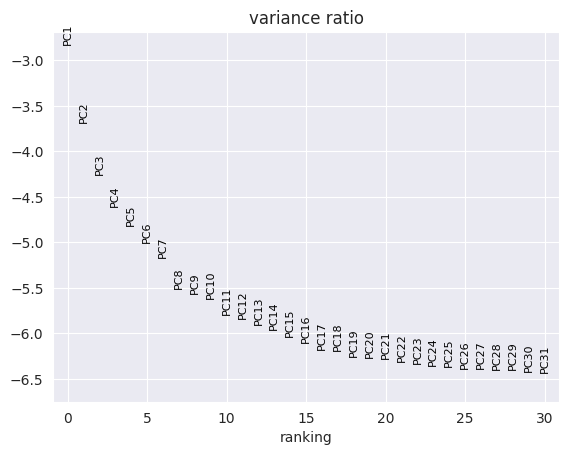

In [64]:
#PCA
sc.tl.pca(adata_24h, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_24h, log=True)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


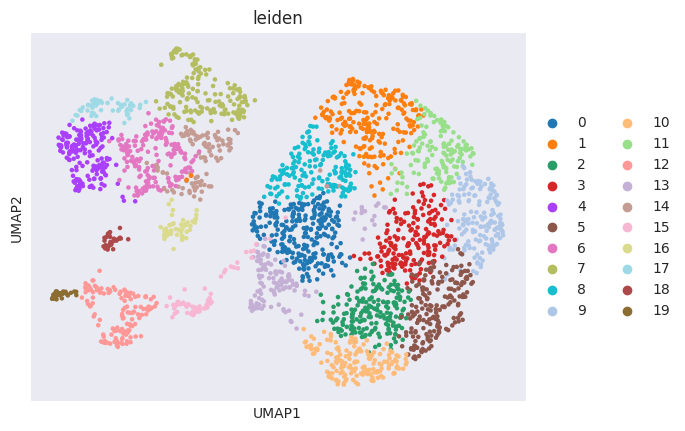

In [65]:
#Umap
sc.pp.neighbors(adata_24h, n_neighbors=20, n_pcs=30)
sc.tl.umap(adata_24h)
sc.tl.leiden(adata_24h, resolution=1)
sc.pl.umap(adata_24h, color=['leiden'])

In [66]:
adata_24h.obs

background_fraction  cell_probability     cell_size  \
barcode                                                                   
CCTGTTGTCCGTCAAA-1             0.012063          0.999955  31698.152344   
AAACGCTGTTGCCGAC-1             0.019503          0.999955  32785.800781   
CATTGTTAGCCAAGTG-1             0.016531          0.999955  32967.527344   
GGGCGTTGTAGCTTGT-1             0.016151          0.999955  31853.427734   
GCAGCTGAGCTGTACT-1             0.017215          0.999955  31754.398438   
...                                 ...               ...           ...   
GGGTAGACAAGAATAC-1             0.568242          0.808540   4180.297363   
GTTGTCCAGTGGACTG-1             0.562795          0.993525   4283.027344   
CTGTGAAGTATCGTTG-1             0.000000          0.763101   3951.583984   
GTCGCGACACAAATAG-1             0.000000          0.954293   3669.194580   
CTACAGAAGCTAGCCC-1             0.000000          0.895690   3664.913818   

                    droplet_efficiency  n_genes  n_genes_by_counts  \
barcode                                                              
CCTGTTGTCCGTCAAA-1            1.394761     2410               2406   
AAACGCTGTTGCCGAC-1            1.291944     2236               2230   
CATTGTTAGCCAAGTG-1            1.282456     1788               1787   
GGGCGTTGTAGCTTGT-1            1.291481     1901               1901   
GCAGCTGAGCTGTACT-1            1.289972     2260               2255   
...                                ...      ...                ...   
GGGTAGACAAGAATAC-1            0.629441      355                352   
GTTGTCCAGTGGACTG-1            0.563271      358                358   
CTGTGAAGTATCGTTG-1            0.509477      201                201   
GTCGCGACACAAATAG-1            0.620188      273                271   
CTACAGAAGCTAGCCC-1            0.605193      309                309   

                    total_counts  total_counts_mt  pct_counts_mt leiden  
barcode                                                                  
CCTGTTGTCCGTCAAA-1         40618                0            0.0     13  
AAACGCTGTTGCCGAC-1         38755                0            0.0      0  
CATTGTTAGCCAAGTG-1         38787                0            0.0      8  
GGGCGTTGTAGCTTGT-1         37646                0            0.0      0  
GCAGCTGAGCTGTACT-1         37446                0            0.0      0  
...                          ...              ...            ...    ...  
GGGTAGACAAGAATAC-1           481                0            0.0     12  
GTTGTCCAGTGGACTG-1           463                0            0.0     12  
CTGTGAAGTATCGTTG-1           783                0            0.0      7  
GTCGCGACACAAATAG-1           771                0            0.0      6  
CTACAGAAGCTAGCCC-1           752                0            0.0      6  

[2806 rows x 10 columns]

/home/nikvaku/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_group

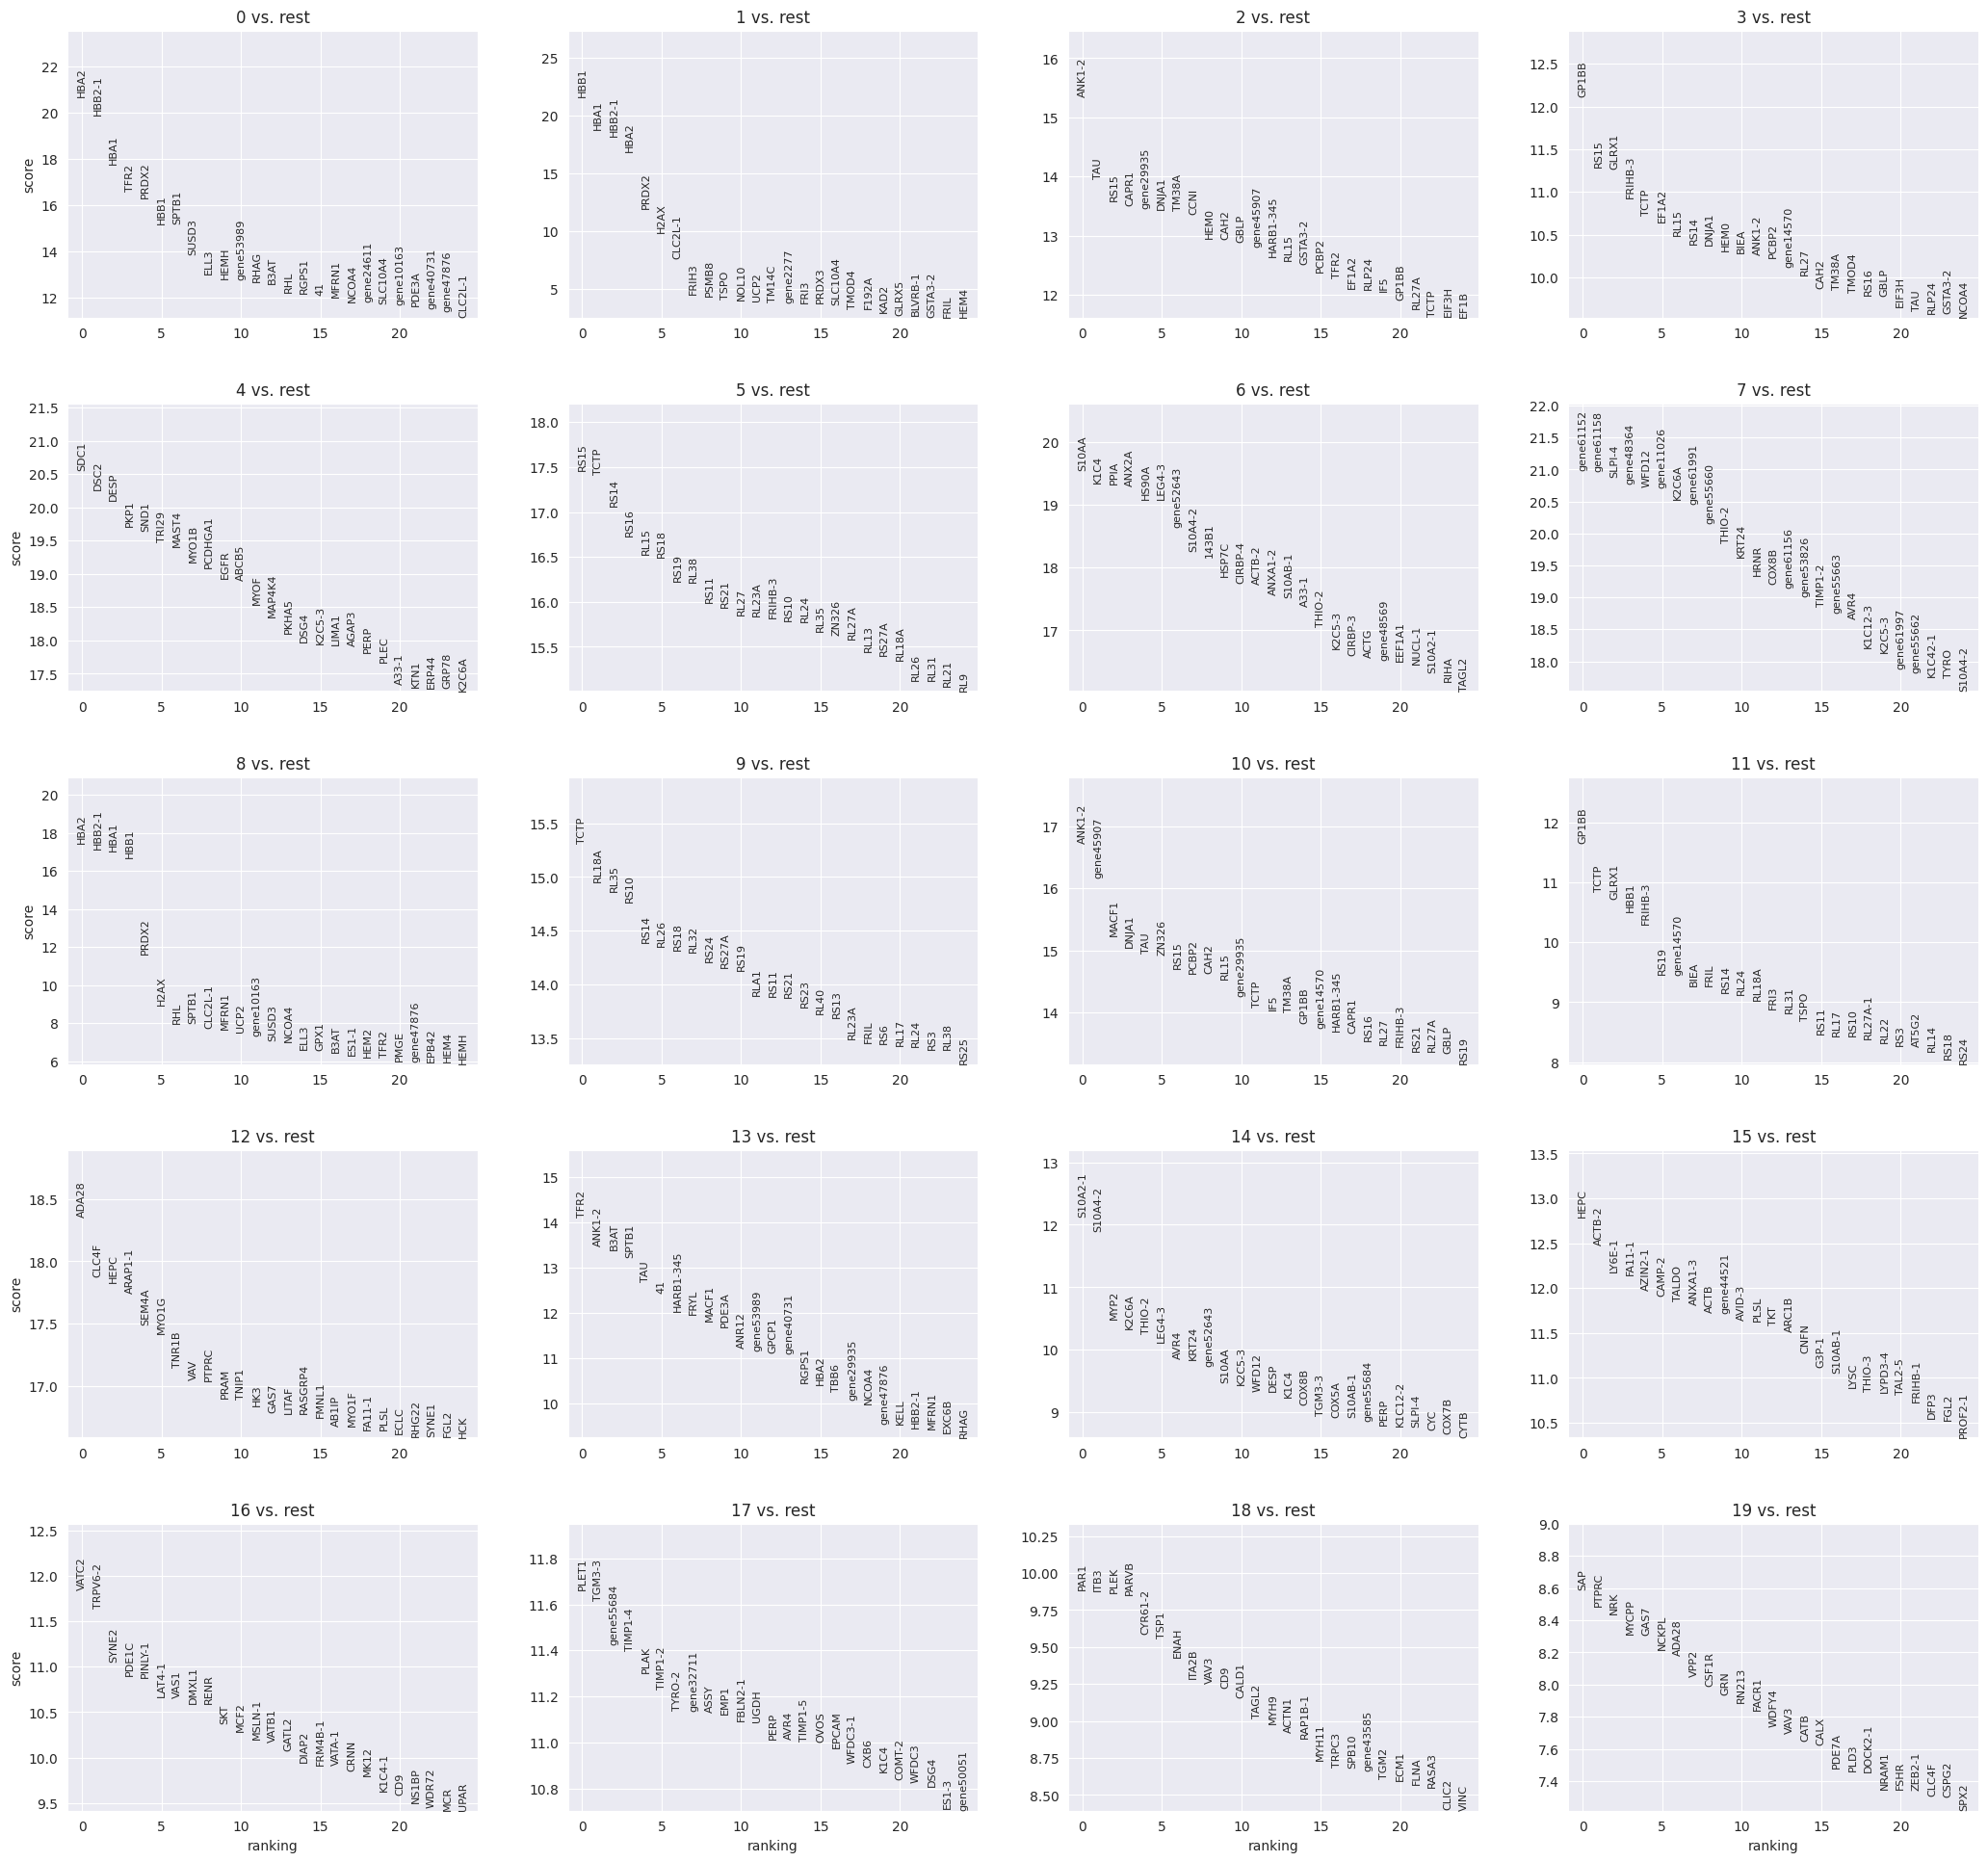

In [77]:
#Differential expression
sc.tl.rank_genes_groups(adata_24h, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_24h, n_genes=25, sharey=False)

In [93]:
#72h data
adata_72h=sc.read_10x_h5('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/matrix_filtered_clear/limb_regen_data/72hpa/output_filtered.h5')
adata_72h=anndata_from_h5('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/matrix_filtered_clear/limb_regen_data/72hpa/output.h5')

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [82]:
adata_72h

AnnData object with n_obs × n_vars = 20247 × 65597
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed'
    uns: 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'

In [94]:
mapper=pd.read_table("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/aPlwal.pri.V2.genome.annots.tsv")
mapper_dict = mapper.set_index('#gene_id')['EggNM.Preferred_name'].to_dict()

new_var_names_pl = []  # Create an empty list to store the updated variable names

# Iterate through each gene_id in the mapper_dict
for gene_id in adata_72h.var_names:
    # Check if the gene_id exists in adata_pl.var_names and if its mapping is not '.'
    if gene_id in mapper_dict.keys() and mapper_dict[gene_id] != '.':
        # Debugging: Print gene_id and its mapping
        print(f"Updating: {gene_id} -> {mapper_dict[gene_id]}")
        # If conditions are met, append the mapped gene_id to new_var_names_pl
        new_var_names_pl.append(mapper_dict[gene_id])
    else:
        # Debugging: Print gene_id that's not updated
        print(f"Not Updating: {gene_id}")
        # If conditions are not met, append the original gene_id to new_var_names_pl
        new_var_names_pl.append(gene_id)

# Update the variable names of adata_pl with the new_var_names_pl list
adata_72h.var_names = new_var_names_pl

Not Updating: POL3
Not Updating: gene26597
Not Updating: gene26598
Not Updating: SPX2
Not Updating: gene26599
Not Updating: gene26600
Not Updating: gene26601
Not Updating: gene26602
Updating: gene26603 -> PKNOX2
Not Updating: POL
Not Updating: gene26605
Not Updating: MYPOP
Not Updating: RTXE
Not Updating: HARB1
Not Updating: MYPOP
Not Updating: gene26610
Not Updating: gene26611
Not Updating: LIN1
Not Updating: POL
Not Updating: MYPOP
Not Updating: HARB1
Not Updating: RL23
Not Updating: gene26617
Not Updating: LORF2
Not Updating: gene26619
Not Updating: gene26620
Not Updating: gene26621
Not Updating: PGBD4
Not Updating: gene26623
Not Updating: gene26624
Not Updating: POL
Not Updating: gene26626
Not Updating: POL4
Not Updating: gene26628
Not Updating: gene26629
Not Updating: gene26630
Not Updating: LORF2
Not Updating: ZN583
Not Updating: PGBD4
Not Updating: PGBD4
Not Updating: SIAE
Not Updating: gene26636
Not Updating: gene26637
Not Updating: POL4
Not Updating: gene26639
Not Updating: PO

In [69]:
#Preprocessing
import re
sc.pp.filter_cells(adata_72h, min_genes=200)
sc.pp.filter_genes(adata_72h, min_cells=3)
adata_72h.var['mt']=adata_72h.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_72h, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata_72h = adata_72h[adata_72h.obs.pct_counts_mt < 5, :]
adata_72h=adata_72h[adata_72h.obs.n_genes_by_counts < 2500, :]
#Removing the mt genes
# Patterns for gene names to remove
patterns_to_remove = ['COX1', 'COX2', 'ATP8', 'ATP6', 'COX3', 'NU1M', 'NU2M', 'NU3M', 'NU4M', 'NU4LM', 'NU5M', 'NU6M', 'CYB']

# Create a regular expression pattern by joining the patterns with the '|' (OR) operator
gene_pattern = '|'.join(patterns_to_remove)

# Use the regex pattern to filter and remove genes
adata_72h = adata_72h[:, ~adata_72h.var_names.str.contains(gene_pattern, regex=True)]
adata_72h.var_names_make_unique()

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/a

In [70]:
#Preprocessing
sc.pp.normalize_total(adata_72h, target_sum=1e4)
sc.pp.log1p(adata_72h)
sc.pp.scale(adata_72h, max_value=10)

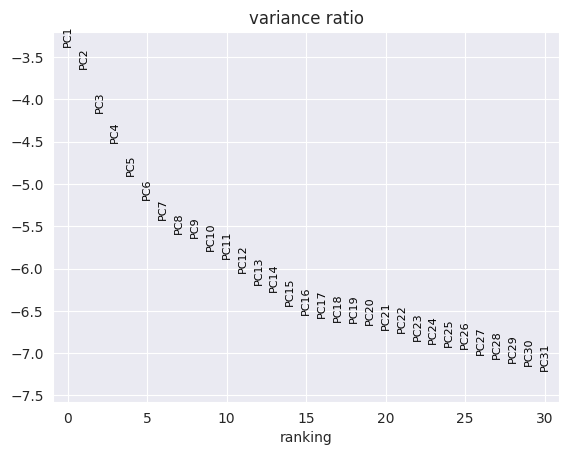

In [71]:
#PCA
sc.tl.pca(adata_72h, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_72h, log=True)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


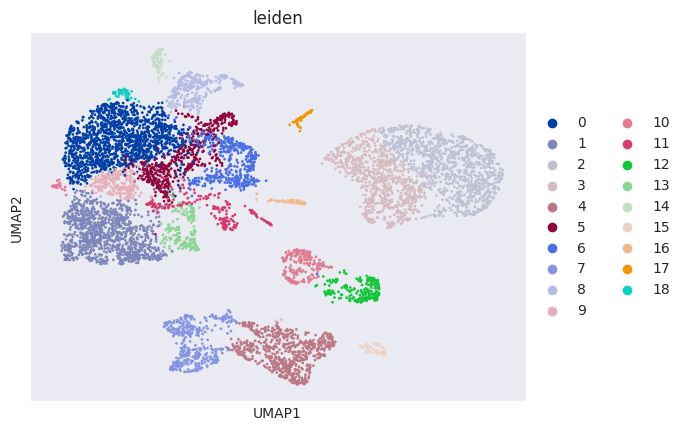

In [74]:
#Umap
sc.pp.neighbors(adata_72h, n_neighbors=20, n_pcs=30)
sc.tl.umap(adata_72h)
sc.tl.leiden(adata_72h, resolution=0.5)
sc.pl.umap(adata_72h, color=['leiden'])

In [73]:
adata_72h.obs

background_fraction  cell_probability     cell_size  \
barcode                                                                   
GCAGCTGTCTCCGAGG-1             0.040432          0.999955  15596.538086   
TCTAACTAGTTAGTAG-1             0.036843          0.999955  16716.804688   
CAGCAATTCCAGCAAT-1             0.035696          0.999955  15684.721680   
GAATCGTGTTACGCCG-1             0.037362          0.999955  15089.028320   
AGCCACGCAGCTCCTT-1             0.049425          0.999955  15291.927734   
...                                 ...               ...           ...   
TTCGATTGTTTAGTCG-1             0.637743          0.925167   3824.761475   
TGGGCGTCACGAAGAC-1             0.529794          0.987571   3823.619873   
CGAAGGACAGCACGAA-1             0.393246          0.503789   3815.795166   
GTGAGTTTCGGTGTAT-1             0.619889          0.888236   3760.400391   
AAGACTCTCACCATAG-1             0.718501          0.910642   3726.048340   

                    droplet_efficiency  n_genes  n_genes_by_counts  \
barcode                                                              
GCAGCTGTCTCCGAGG-1            1.634816     2166               2164   
TCTAACTAGTTAGTAG-1            1.501025     1941               1940   
CAGCAATTCCAGCAAT-1            1.609588     2366               2363   
GAATCGTGTTACGCCG-1            1.611623     2306               2306   
AGCCACGCAGCTCCTT-1            1.567471     1841               1837   
...                                ...      ...                ...   
TTCGATTGTTTAGTCG-1            0.520016      225                225   
TGGGCGTCACGAAGAC-1            0.520363      216                216   
CGAAGGACAGCACGAA-1            0.517560      451                451   
GTGAGTTTCGGTGTAT-1            0.528433      283                283   
AAGACTCTCACCATAG-1            0.525685      222                222   

                    total_counts  total_counts_mt  pct_counts_mt leiden  
barcode                                                                  
GCAGCTGTCTCCGAGG-1         21334                0            0.0      6  
TCTAACTAGTTAGTAG-1         21305                0            0.0      6  
CAGCAATTCCAGCAAT-1         21257                0            0.0      6  
GAATCGTGTTACGCCG-1         20303                0            0.0      6  
AGCCACGCAGCTCCTT-1         19825                0            0.0      6  
...                          ...              ...            ...    ...  
TTCGATTGTTTAGTCG-1           334                0            0.0     21  
TGGGCGTCACGAAGAC-1           434                0            0.0     23  
CGAAGGACAGCACGAA-1           557                0            0.0     18  
GTGAGTTTCGGTGTAT-1           344                0            0.0      1  
AAGACTCTCACCATAG-1           248                0            0.0      1  

[7834 rows x 10 columns]

/home/nikvaku/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_group

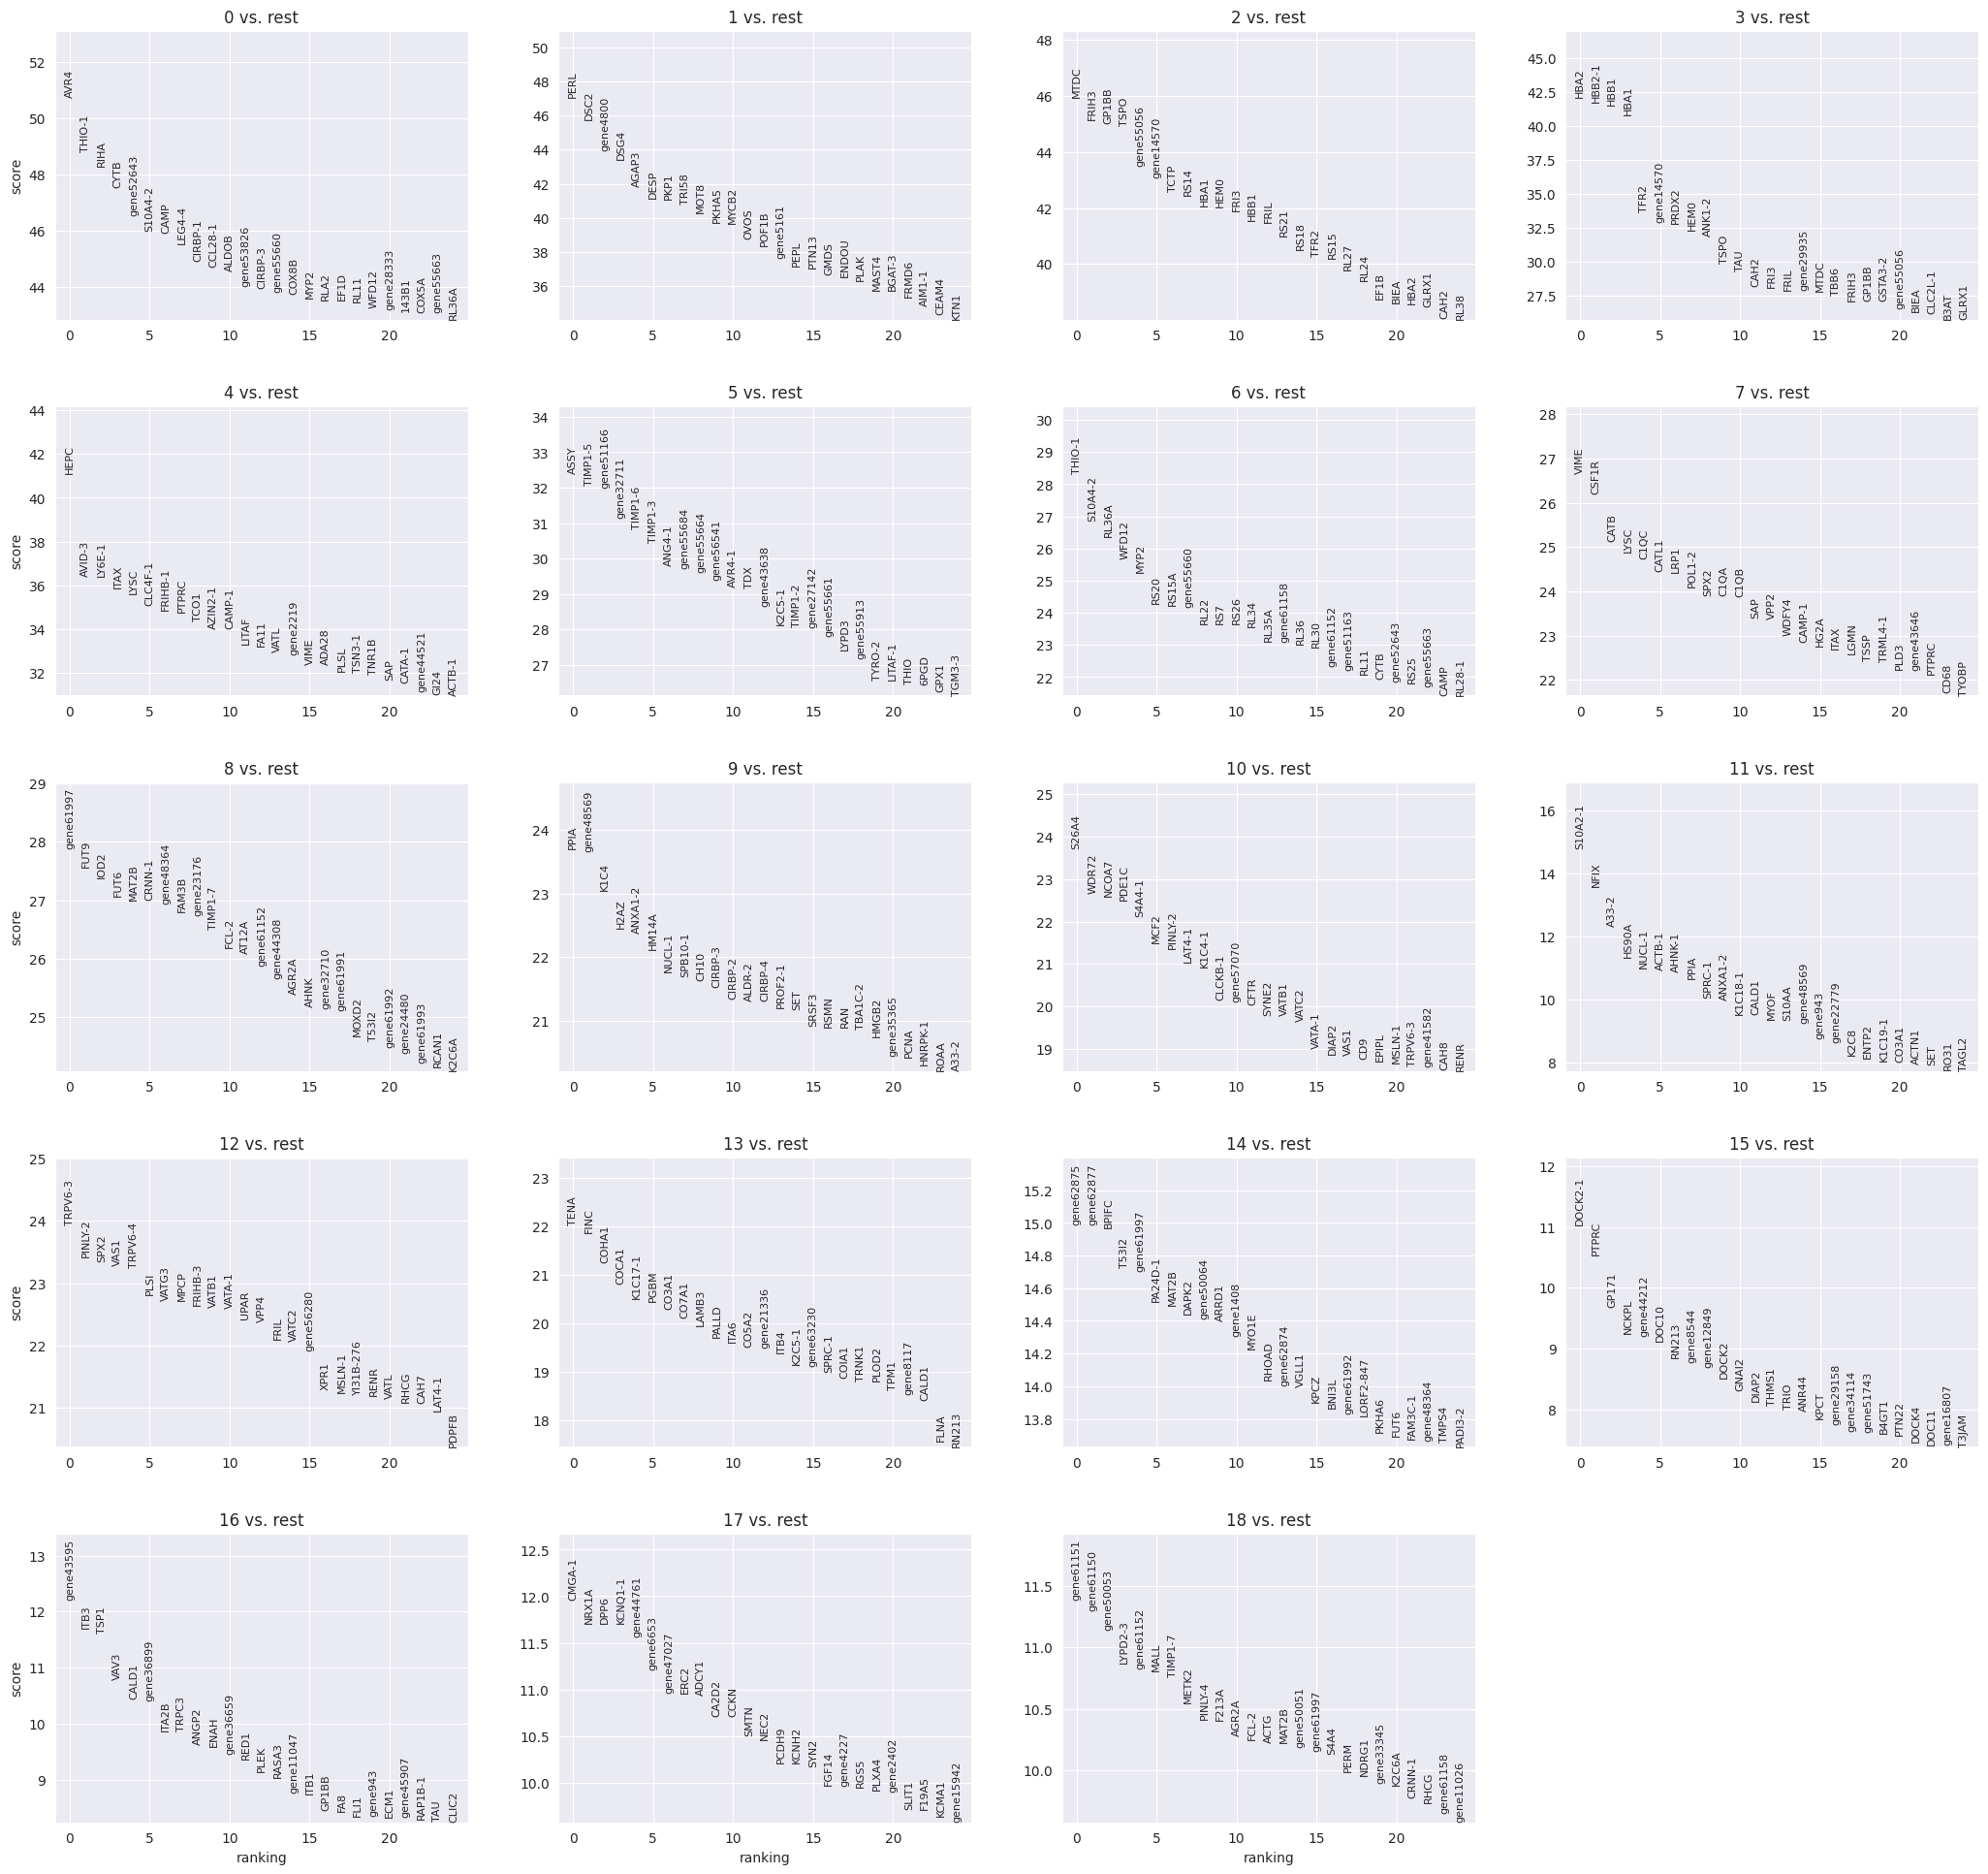

In [78]:
#Differential expression
sc.tl.rank_genes_groups(adata_72h, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_72h, n_genes=25, sharey=False)

In [95]:
#Combined data
import anndata as ad

adata_in.var_names_make_unique()
adata_24h.var_names_make_unique()
adata_72h.var_names_make_unique()
adata_comb=ad.concat([adata_in,adata_24h,adata_72h],join='outer')

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [96]:
adata_comb

AnnData object with n_obs × n_vars = 44814 × 65597
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency'
    obsm: 'gene_expression_encoding'

In [98]:
#Save the combined data
#adata_comb.write('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/matrix_filtered_clear/limb_regen_data/adata_comb.h5ad')



In [99]:
import re
sc.pp.filter_cells(adata_comb, min_genes=200)
sc.pp.filter_genes(adata_comb, min_cells=3)
adata_comb.var['mt']=adata_comb.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_comb, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata_comb = adata_comb[adata_comb.obs.pct_counts_mt < 5, :]
adata_comb=adata_comb[adata_comb.obs.n_genes_by_counts < 2500, :]
#Removing the mt genes
# Patterns for gene names to remove
patterns_to_remove = ['COX1', 'COX2', 'ATP8', 'ATP6', 'COX3', 'NU1M', 'NU2M', 'NU3M', 'NU4M', 'NU4LM', 'NU5M', 'NU6M', 'CYB']

# Create a regular expression pattern by joining the patterns with the '|' (OR) operator
gene_pattern = '|'.join(patterns_to_remove)

# Use the regex pattern to filter and remove genes
adata_comb = adata_comb[:, ~adata_comb.var_names.str.contains(gene_pattern, regex=True)]
adata_comb.var_names_make_unique()

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-pack

In [100]:
adata_comb.obs_names_make_unique()